In [14]:
import datetime
import json
import pathlib

import numpy
import scipy.stats

from matplotlib import pyplot
%matplotlib inline

In [45]:
# Loading Mozilla HARs.
archives = [
    json.load(archive.open("rt", encoding="utf-8"))
    for archive in pathlib.Path().glob("Archive *.json")
]
print("%s archives." % len(archives))

2 archives.


### Request Delay Analysis

Min: 0.00100016593933.
Max: 1.59200000763.


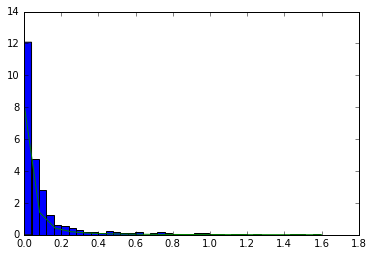

Distribution params: (0.93625467820589447, 1.0092033070953008e-06, 0.038028431671132297).


In [62]:
x = numpy.concatenate([
    numpy.diff([
        datetime.datetime.strptime(entry["startedDateTime"][:23], "%Y-%m-%dT%H:%M:%S.%f").timestamp()
        for entry in archive["log"]["entries"]
    ])
    for archive in archives
])

# Get rid of 5% of the lowest and the largest values.
x.sort()
x = x[(x.shape[0] * 5 // 100):(x.shape[0] * 95 // 100)]
print("Min: %s." % x.min())
print("Max: %s." % x.max())

space = numpy.linspace(0.0, 1.6, 20)
params = scipy.stats.t.fit(numpy.concatenate((x, -x)))

pyplot.hist(x, bins=40, normed=True)
pyplot.plot(space, scipy.stats.t(*params).pdf(space))
pyplot.show()

print("Distribution params: %s." % (params, ))